In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('E:\ASISTENSI NN\HousingPrices.csv')
df

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,SalePrice
0,2003,854,1710,2,1,3,8,2008,208500
1,1976,0,1262,2,0,3,6,2007,181500
2,2001,866,1786,2,1,3,6,2008,223500
3,1915,756,1717,1,0,3,7,2006,140000
4,2000,1053,2198,2,1,4,9,2008,250000
...,...,...,...,...,...,...,...,...,...
1455,1999,694,1647,2,1,3,7,2007,175000
1456,1978,0,2073,2,0,3,7,2010,210000
1457,1941,1152,2340,2,0,4,9,2010,266500
1458,1950,0,1078,1,0,2,5,2010,142125


In [3]:
X = df.drop(columns=['SalePrice'])
Y = df[['SalePrice']]

In [4]:
Y = np.array(Y)
Y = np.transpose(Y)
Y = preprocessing.normalize(Y)
Y = np.transpose(Y)
Y

array([[0.02761715],
       [0.02404083],
       [0.02960399],
       ...,
       [0.03529961],
       [0.01882536],
       [0.01953731]])

In [5]:
X = np.array(X)
X = np.transpose(X)
X = preprocessing.normalize(X)
X = np.transpose(X)
X

array([[0.02658936, 0.04008849, 0.02790204, ..., 0.0263452 , 0.03116878,
        0.02617359],
       [0.02623095, 0.        , 0.02059203, ..., 0.0263452 , 0.02337658,
        0.02616056],
       [0.02656281, 0.0406518 , 0.02914213, ..., 0.0263452 , 0.02337658,
        0.02617359],
       ...,
       [0.02576633, 0.05407722, 0.03818174, ..., 0.03512693, 0.03506488,
        0.02619966],
       [0.0258858 , 0.        , 0.01758971, ..., 0.01756347, 0.01948049,
        0.02619966],
       [0.02608492, 0.        , 0.02049413, ..., 0.0263452 , 0.02337658,
        0.02617359]])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [7]:
lr = 0.01
np.random.seed(1)
w = np.array([
np.random.randn(1),
np.random.randn(1),
np.random.randn(1),
np.random.randn(1),
np.random.randn(1),
np.random.randn(1),
np.random.randn(1),
np.random.randn(1),
])
w

array([[ 1.62434536],
       [-0.61175641],
       [-0.52817175],
       [-1.07296862],
       [ 0.86540763],
       [-2.3015387 ],
       [ 1.74481176],
       [-0.7612069 ]])

In [8]:
error_list = []
for i in range(50):
  y_pred = np.matmul(x_train,w) #Dapetin nilai y hasil dari perkalian x dgn bobot awal
  error = (y_train-y_pred)**2 #Hitung error/selisih antara y_pred sm y aslinya

  #Untuk menghitung tingkat perubahan/gradient descent/delta dari setiap bobot
  #Selisih y_train - y_pred dikali sama nilai negatif dari x_train agar bobotnya menyesuaikan ke arah yang sesuai
  dEw1 = 2*np.matmul((y_train-y_pred).T,(-x_train[:,0].reshape(x_train.shape[0],1)))
  dEw2 = 2*np.matmul((y_train-y_pred).T,(-x_train[:,1].reshape(x_train.shape[0],1)))
  dEw3 = 2*np.matmul((y_train-y_pred).T,(-x_train[:,2].reshape(x_train.shape[0],1)))
  dEw4 = 2*np.matmul((y_train-y_pred).T,(-x_train[:,3].reshape(x_train.shape[0],1)))
  dEw5 = 2*np.matmul((y_train-y_pred).T,(-x_train[:,4].reshape(x_train.shape[0],1)))
  dEw6 = 2*np.matmul((y_train-y_pred).T,(-x_train[:,5].reshape(x_train.shape[0],1)))
  dEw7 = 2*np.matmul((y_train-y_pred).T,(-x_train[:,6].reshape(x_train.shape[0],1)))
  dEw8 = 2*np.matmul((y_train-y_pred).T,(-x_train[:,7].reshape(x_train.shape[0],1)))

  #Update bobot
  w[0][0] = w[0][0] - lr * dEw1
  w[1][0] = w[1][0] - lr * dEw2
  w[2][0] = w[2][0] - lr * dEw3
  w[3][0] = w[3][0] - lr * dEw4
  w[4][0] = w[4][0] - lr * dEw5
  w[5][0] = w[5][0] - lr * dEw6
  w[6][0] = w[6][0] - lr * dEw7
  w[7][0] = w[7][0] - lr * dEw8

  error_list.append(error.mean())
  print("Adjusted weight: ", np.transpose(w),
        "\nError: ", error.mean())

Adjusted weight:  [[ 1.65552822 -0.58661808 -0.49504286 -1.03941246  0.8819706  -2.26847024
   1.77754069 -0.73006275]] 
Error:  0.003371311169052368
Adjusted weight:  [[ 1.68327382 -0.56418451 -0.46542068 -1.00929544  0.89600598 -2.23887631
   1.80674548 -0.70235283]] 
Error:  0.0027853578704228996
Adjusted weight:  [[ 1.70795711 -0.54415757 -0.43892214 -0.98224269  0.90779613 -2.21237771
   1.83281084 -0.67770255]] 
Error:  0.0023196501371311783
Adjusted weight:  [[ 1.72991206 -0.52627183 -0.4152061  -0.95792031  0.91759246 -2.18863675
   1.85607938 -0.65577826]] 
Error:  0.0019493299517288328
Adjusted weight:  [[ 1.74943609 -0.5102909  -0.39396871 -0.93603096  0.92561883 -2.16735264
   1.87685624 -0.63628281]] 
Error:  0.0016546808750548766
Adjusted weight:  [[ 1.76679411 -0.49600431 -0.37493937 -0.91630978  0.93207454 -2.14825752
   1.89541318 -0.61895153]] 
Error:  0.0014200645195785438
Adjusted weight:  [[ 1.78222206 -0.48322465 -0.35787709 -0.8985209   0.93713703 -2.13111282
   

C:\Users\rians\AppData\Local\Temp\ipykernel_3824\2167711319.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[0][0] = w[0][0] - lr * dEw1
C:\Users\rians\AppData\Local\Temp\ipykernel_3824\2167711319.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[1][0] = w[1][0] - lr * dEw2
C:\Users\rians\AppData\Local\Temp\ipykernel_3824\2167711319.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w[2][0] = w[2][0] - lr * dEw3
C:\Users\rians\AppData\Local\Temp\ipyker

Train error rate:  0.0003868357336303409


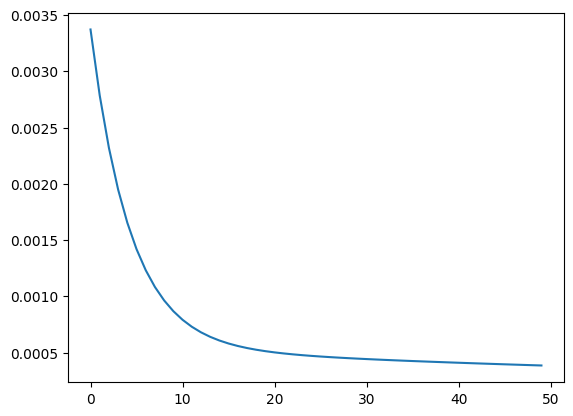

In [9]:
plt.plot(error_list)
print("Train error rate: ", np.mean(error))

In [10]:
def test_section(test_data, weight):
    y_model = np.matmul(test_data, weight)
    y_error = (y_model-y_test)**2
    print("Test error rate: ", y_error.mean())

test_section(x_test, w)

Test error rate:  0.0004525116717088416
